Training set size: (7012, 16)
Testing set size: (1754, 16)
SVM model trained successfully.
Cross-validation scores: [0.12045617 0.11546686 0.11412268 0.12196862 0.12196862]
Mean Cross-validation accuracy: 11.88%
Predictions made on the test set.
SVM Accuracy: 11.17%
Classification Report:
              precision    recall  f1-score   support

           1       0.13      0.18      0.15       151
           2       0.12      0.19      0.15       161
           3       0.10      0.08      0.09       140
           4       0.04      0.03      0.04       131
           5       0.10      0.01      0.01       150
           6       0.11      0.29      0.16       118
           7       0.08      0.03      0.04       151
           8       0.13      0.16      0.15       140
           9       0.08      0.10      0.09       153
          10       0.16      0.14      0.15       160
          11       0.13      0.15      0.14       151
          12       0.00      0.00      0.00       148

    ac

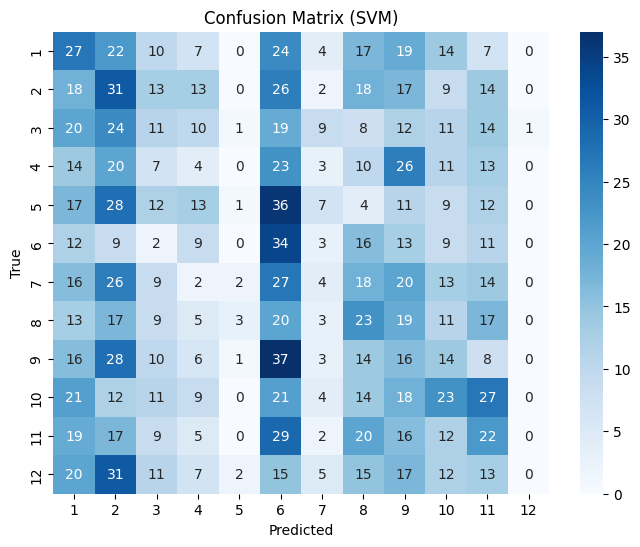


Cross-validation and Model Performance Summary:
  Model  CV Mean Accuracy (%)  Test Set Accuracy (%)
0   SVM             11.879659              11.174458


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load PCA results
pca_data = pd.read_csv('PCA.csv')

# Separate features and labels
features = pca_data.drop(columns=['target'])  # Adjust column name if needed
labels = pca_data['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Train the SVM model
svm = SVC(kernel='linear', random_state=42)  # You can change kernel to 'rbf', 'poly', etc.
svm.fit(X_train, y_train)
print("SVM model trained successfully.")

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Predict on test set
svm_predictions = svm.predict(X_test)
print("Predictions made on the test set.")

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, svm_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_predictions)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels.unique(), yticklabels=labels.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Summarize results in a table format
summary = {
    'Model': ['SVM'],
    'CV Mean Accuracy (%)': [cv_scores.mean() * 100],  # Mean CV score
    'Test Set Accuracy (%)': [svm_accuracy * 100],     # Test set accuracy
}

summary_df = pd.DataFrame(summary)
print("\nCross-validation and Model Performance Summary:")
print(summary_df)
